# Running FLiES for an ECOSTRESS Scene

This is an example of running the artificial neural network emulator of the Forest Light Environmental Simulator (FLiES) corresponding to an ECOsystem Spaceborne Thermal Radiometer Experiment on Space Station (ECOSTRESS) scene.

In [1]:
from os.path import join
from datetime import datetime, date, time
from dateutil import parser
import rasters as rt
from GEOS5FP import GEOS5FP
from koppengeiger import load_koppen_geiger
from solar_apparent_time import UTC_to_solar
import sun_angles
from FLiESANN import FLiESANN
from matplotlib.colors import LinearSegmentedColormap
import logging
logging.disable(logging.CRITICAL)

Here's an example ECOSTRESS albedo scene.

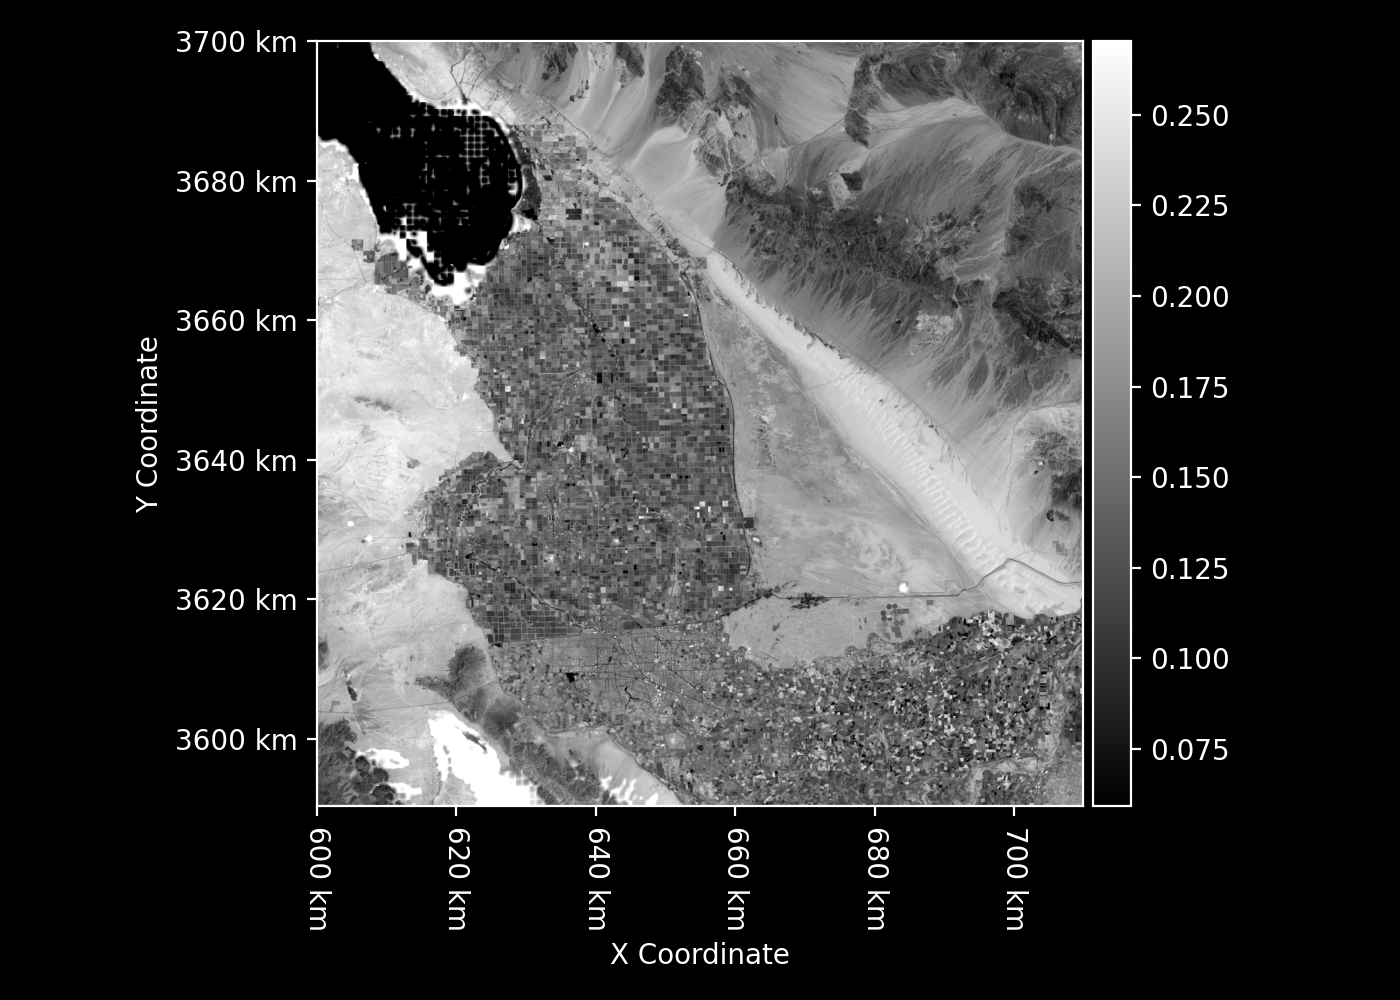

In [2]:
albedo_filename = "ECOv002_L2T_STARS_11SPS_20240728_0712_01_albedo.tif"
albedo_cmap = LinearSegmentedColormap.from_list(name="albedo", colors=["black", "white"])
albedo = rt.Raster.open(albedo_filename, cmap=albedo_cmap)
albedo

Let's get the acquisition time of the scene.

In [3]:
time_UTC = parser.parse(albedo_filename.split("_")[6])
longitude = albedo.geometry.centroid_latlon.x
latitude = albedo.geometry.centroid_latlon.y
time_solar = UTC_to_solar(time_UTC, longitude)
doy_solar = time_solar.timetuple().tm_yday
hour_of_day_solar = time_solar.hour + time_solar.minute / 60 + time_solar.second / 3600
print(f"{time_UTC:%Y-%m-%d %H:%M:%S} UTC")
print(f"{time_solar:%Y-%m-%d %H:%M:%S} solar apparent time at longitude {longitude}")
print(f"day of year {doy_solar} at longitude {longitude}")
print(f"hour of day {hour_of_day_solar} at longitude {longitude}")


2025-06-01 00:00:00 UTC
2025-05-31 16:18:37 solar apparent time at longitude -115.3433725031462
day of year 151 at longitude -115.3433725031462
hour of day 16.310277777777777 at longitude -115.3433725031462


In [4]:
geometry = albedo.geometry
geometry

{
  "dimensions": {
    "rows": 1568,
    "cols": 1568
  },
  "bbox": {
    "xmin": 600000.0,
    "ymin": 3590260.0,
    "xmax": 709760.0,
    "ymax": 3700020.0
  },
  "crs": "EPSG:32611",
  "resolution": {
    "cell_width": 70.0,
    "cell_height": -70.0
  }
}

In [5]:
FLiES_results = FLiESANN(
    geometry=geometry,
    time_UTC=time_UTC,
    albedo=albedo
)

    1/76832 ━━━━━━━━━━━━━━━━━━━━ 30:08 24ms/step

/opt/homebrew/Caskroom/miniforge/base/envs/FLiESANN/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/FLiESANN/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


76832/76832 ━━━━━━━━━━━━━━━━━━━━ 19s 252us/step


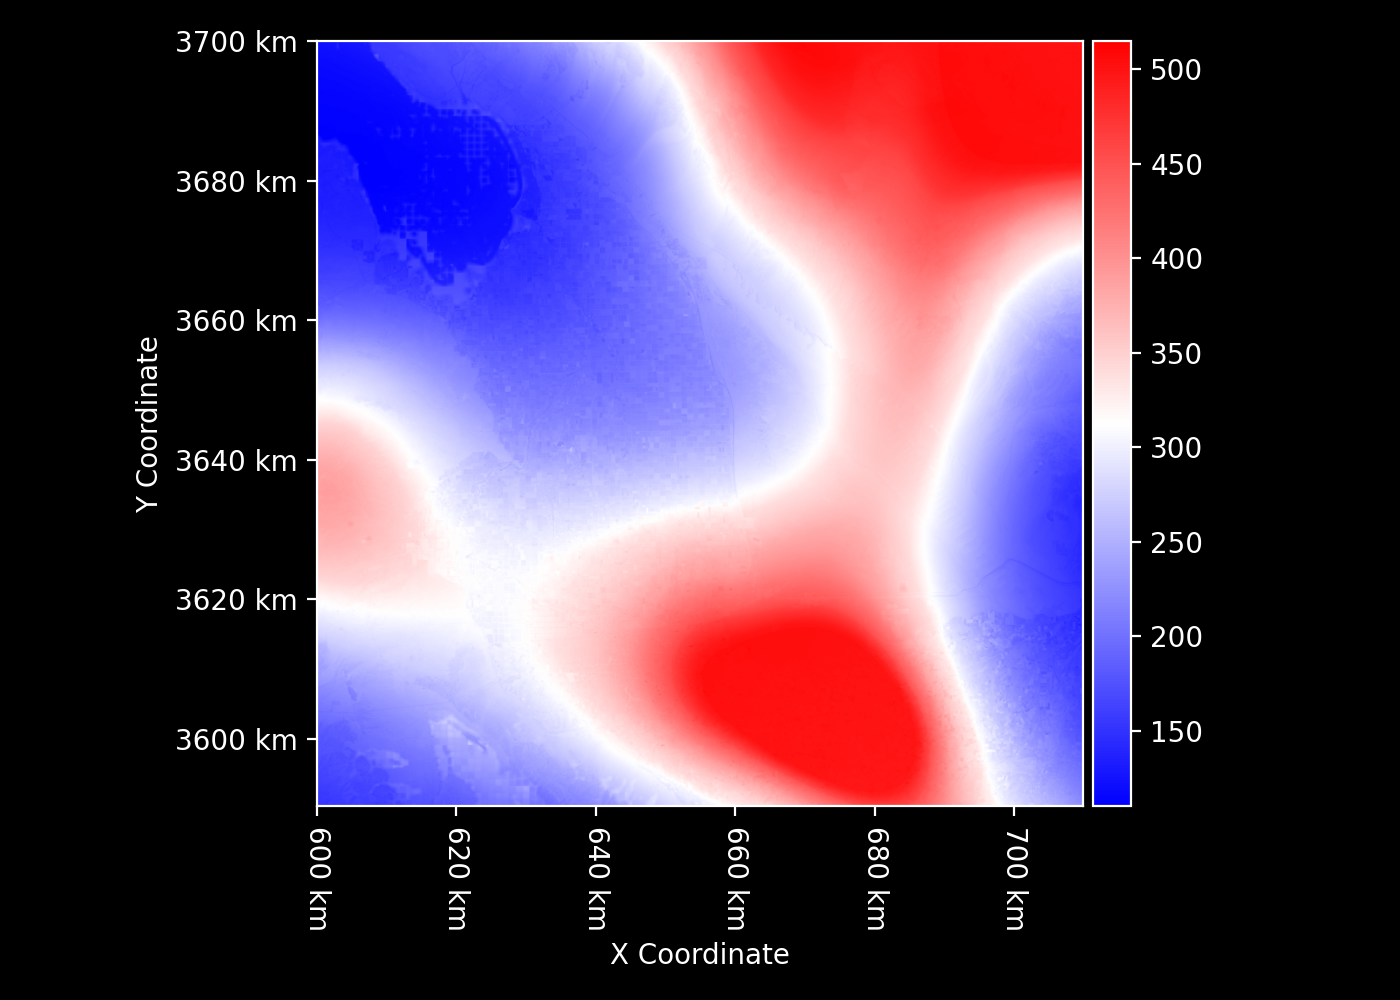

In [6]:
Rg = FLiES_results["Rg"]
Rg.cmap = "bwr"
Rg